# Businesscase:-To predict whether a patient will have diabeties or not??


In [1]:
#Let's start with importing necessary libraries

import pandas as pd# reading the file other necessary operation  
import numpy as np# from that we can get mean median and other operation
from sklearn.preprocessing import StandardScaler # for scaling the data 
from sklearn.linear_model  import LogisticRegression # importing logoistic regression
from sklearn.model_selection import train_test_split # for splitting the data in to trainning and testing 

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score #metric to check model performance
import matplotlib.pyplot as plt # visualization library , analysis of data 
import seaborn as sns # visualization library , analysis of data
%matplotlib inline

In [2]:
# Import the data
data = pd.read_csv("diabeties.csv") # Reading the Data

## Basic Checks

In [3]:
data.head()#it will give you first  5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()#it will give you last 5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()# To check  data type and  non null value of all columns  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Glucose,Bloodpressure,Skinthickness,insulin,bmi cannot have 0 values.This is because of data corruption.

## Exploratory Data Analysis

### Univariate Analysis

In [7]:
!pip install sweetviz

In [8]:
import sweetviz as sv #  library for univariant analysis
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate  Analysis

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data1=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

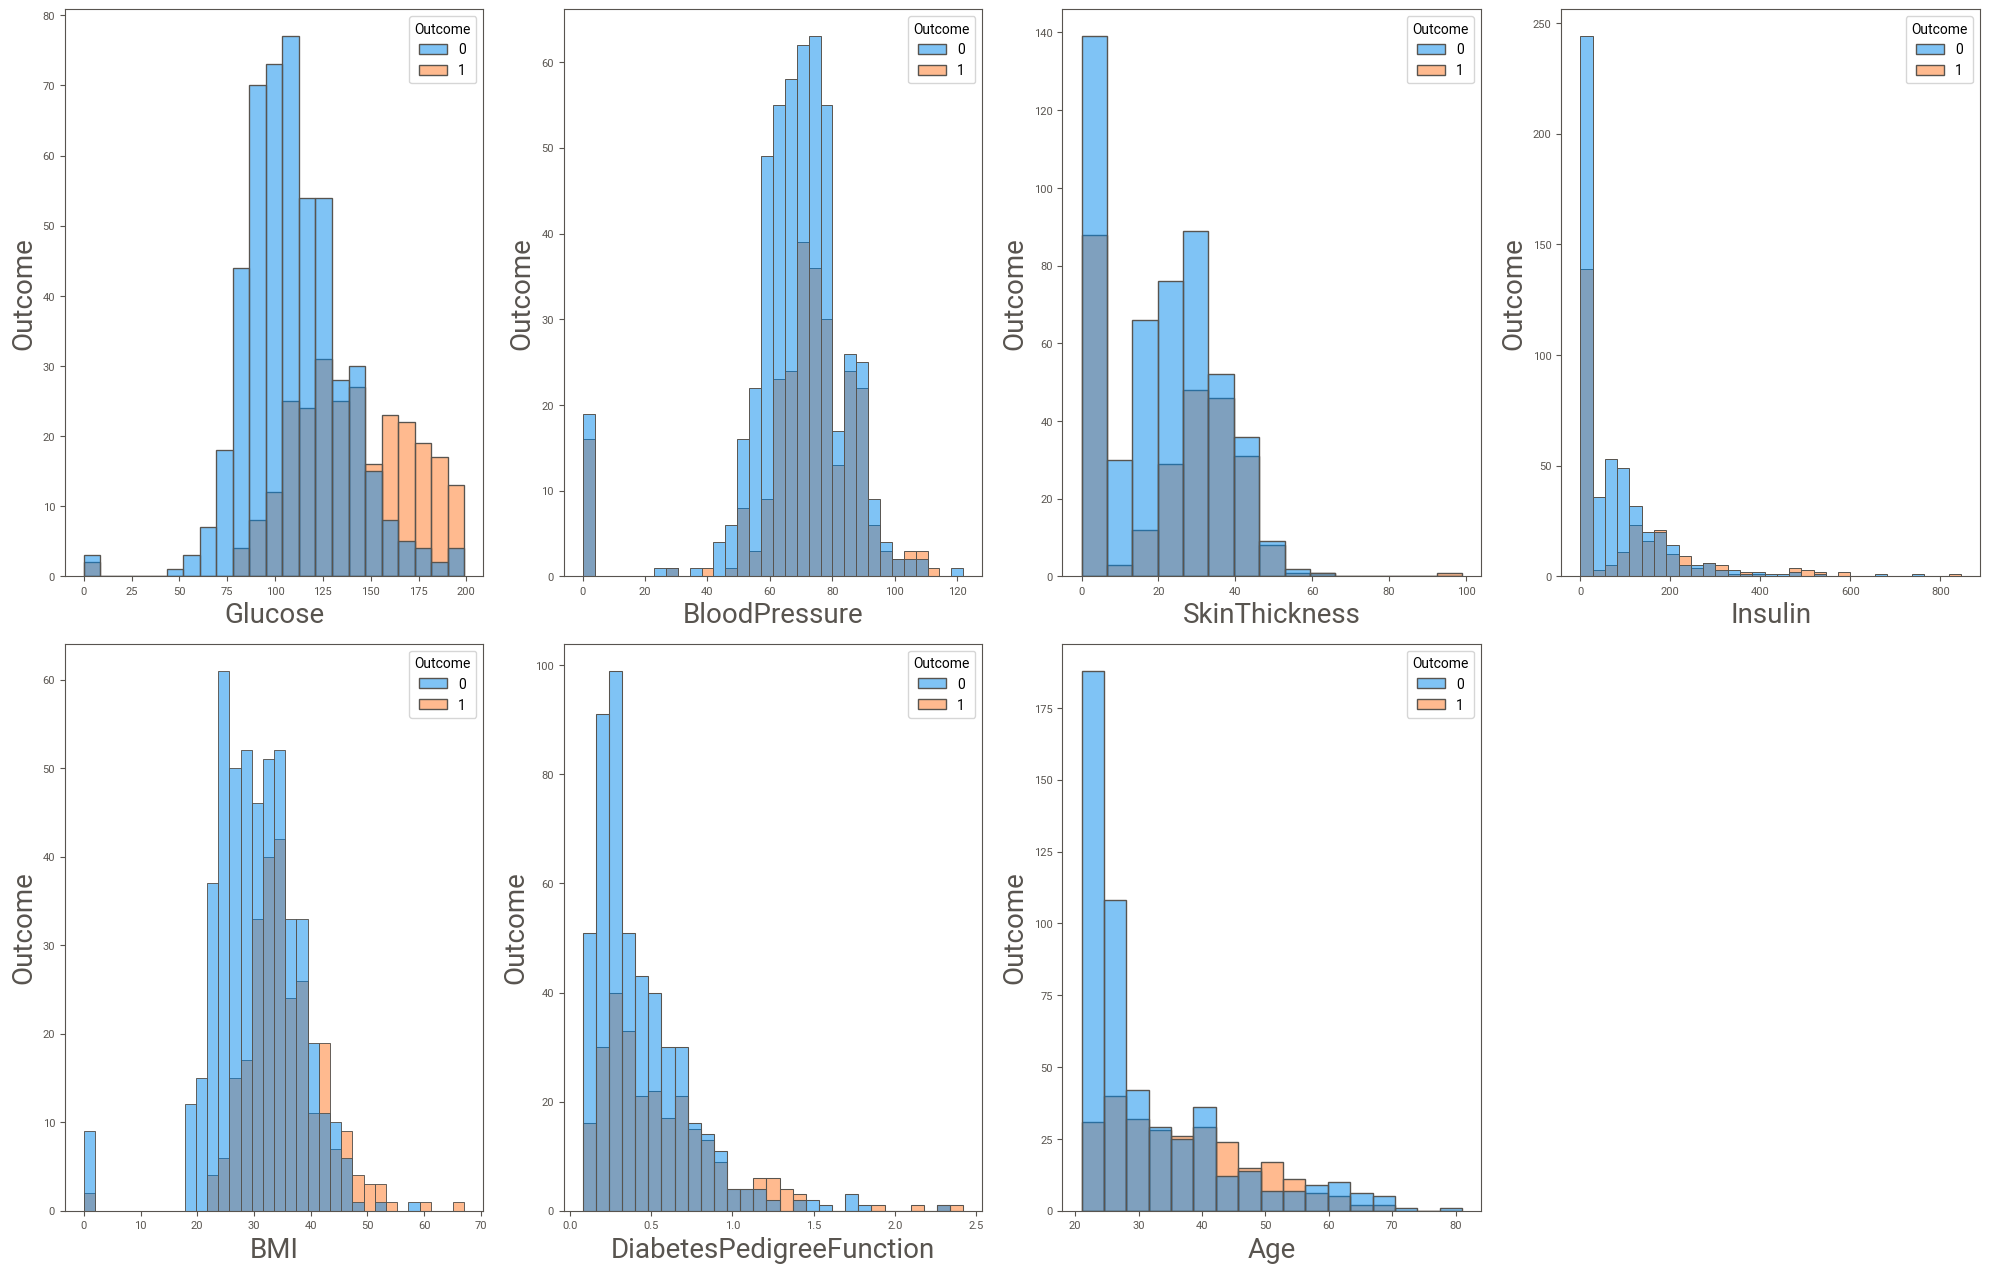

In [12]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],hue=data.Outcome)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

# Data preprocessing 

In [13]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Steps to perform in Feature engineering/data preprocessing

1)Check missing values.Check for corrupted values if any.
2)Convert categorical variable into numerical
3)Handle outlier.
4)Scale the data
5)Transformation of data
6)Balance the data.

In [14]:
## get the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### It seems that there are no missing values in our data. Great, let's see the distribution of data:

C:\Users\viswa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\viswa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\viswa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

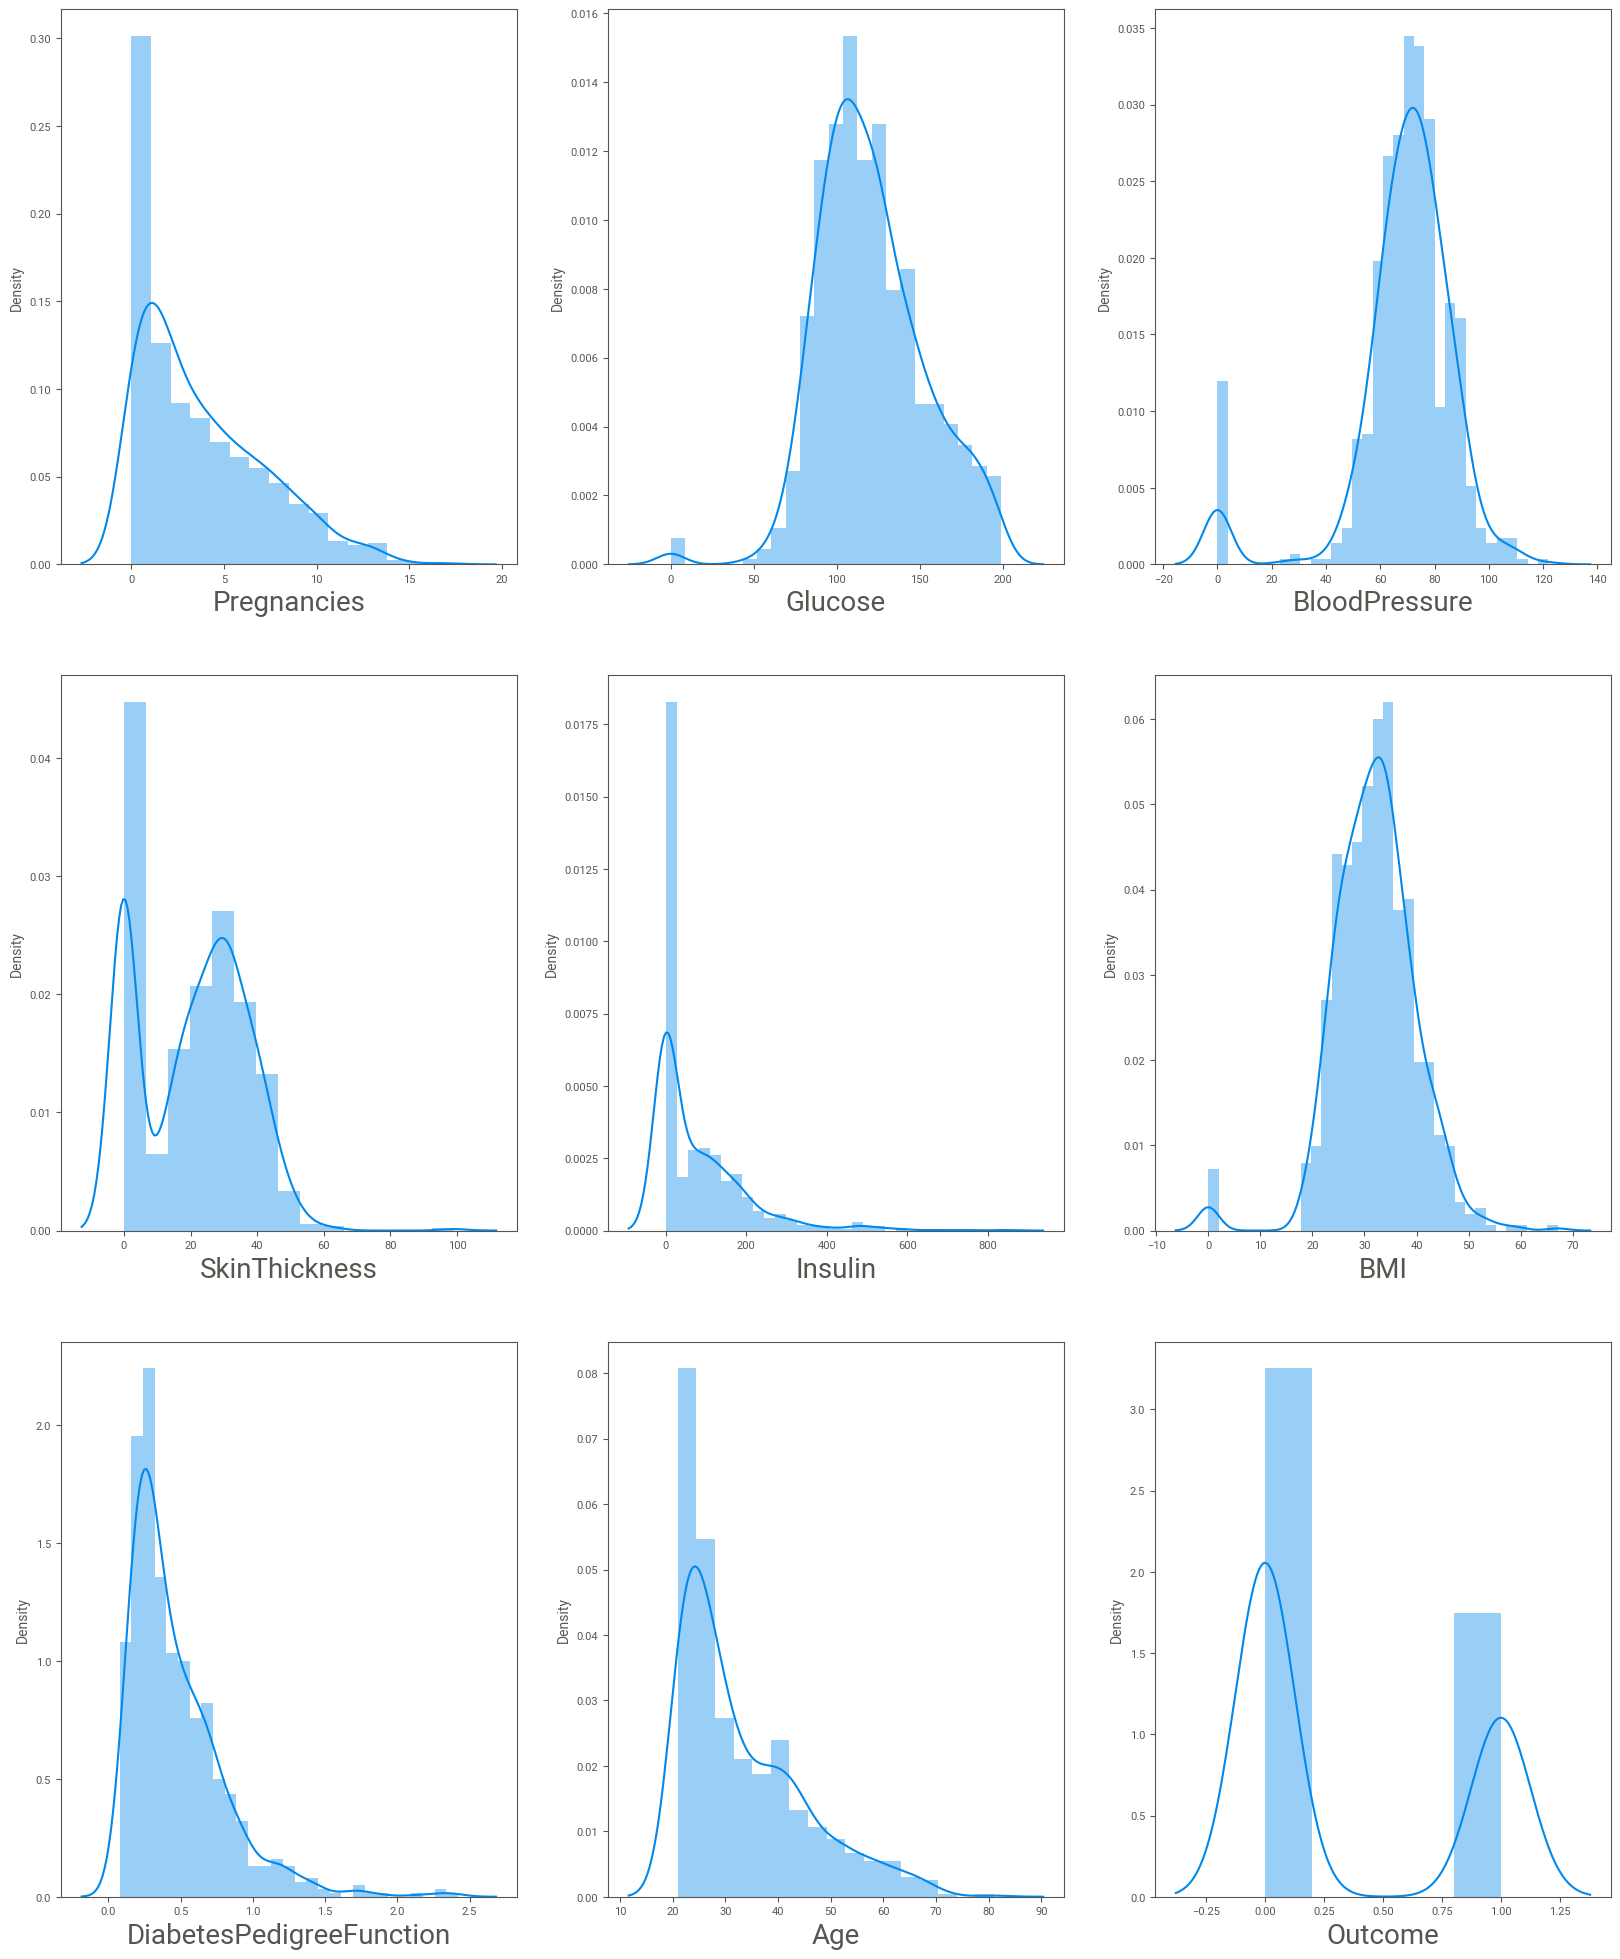

In [15]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=9 :# as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [16]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [17]:
data.loc[data['BMI']==0] # How many rows have BMI=0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [18]:
data['BMI'].mean()#bmi column mean

31.992578124999977

In [19]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())#replacing 0 with mean of the bmi 
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())#replacing 0 with mean of the Bloodpressure 
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())##replacing 0 with mean of the Glucose
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())#replacing 0 with mean of the Insulin
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())#replacing 0 with mean of the Skinthickness

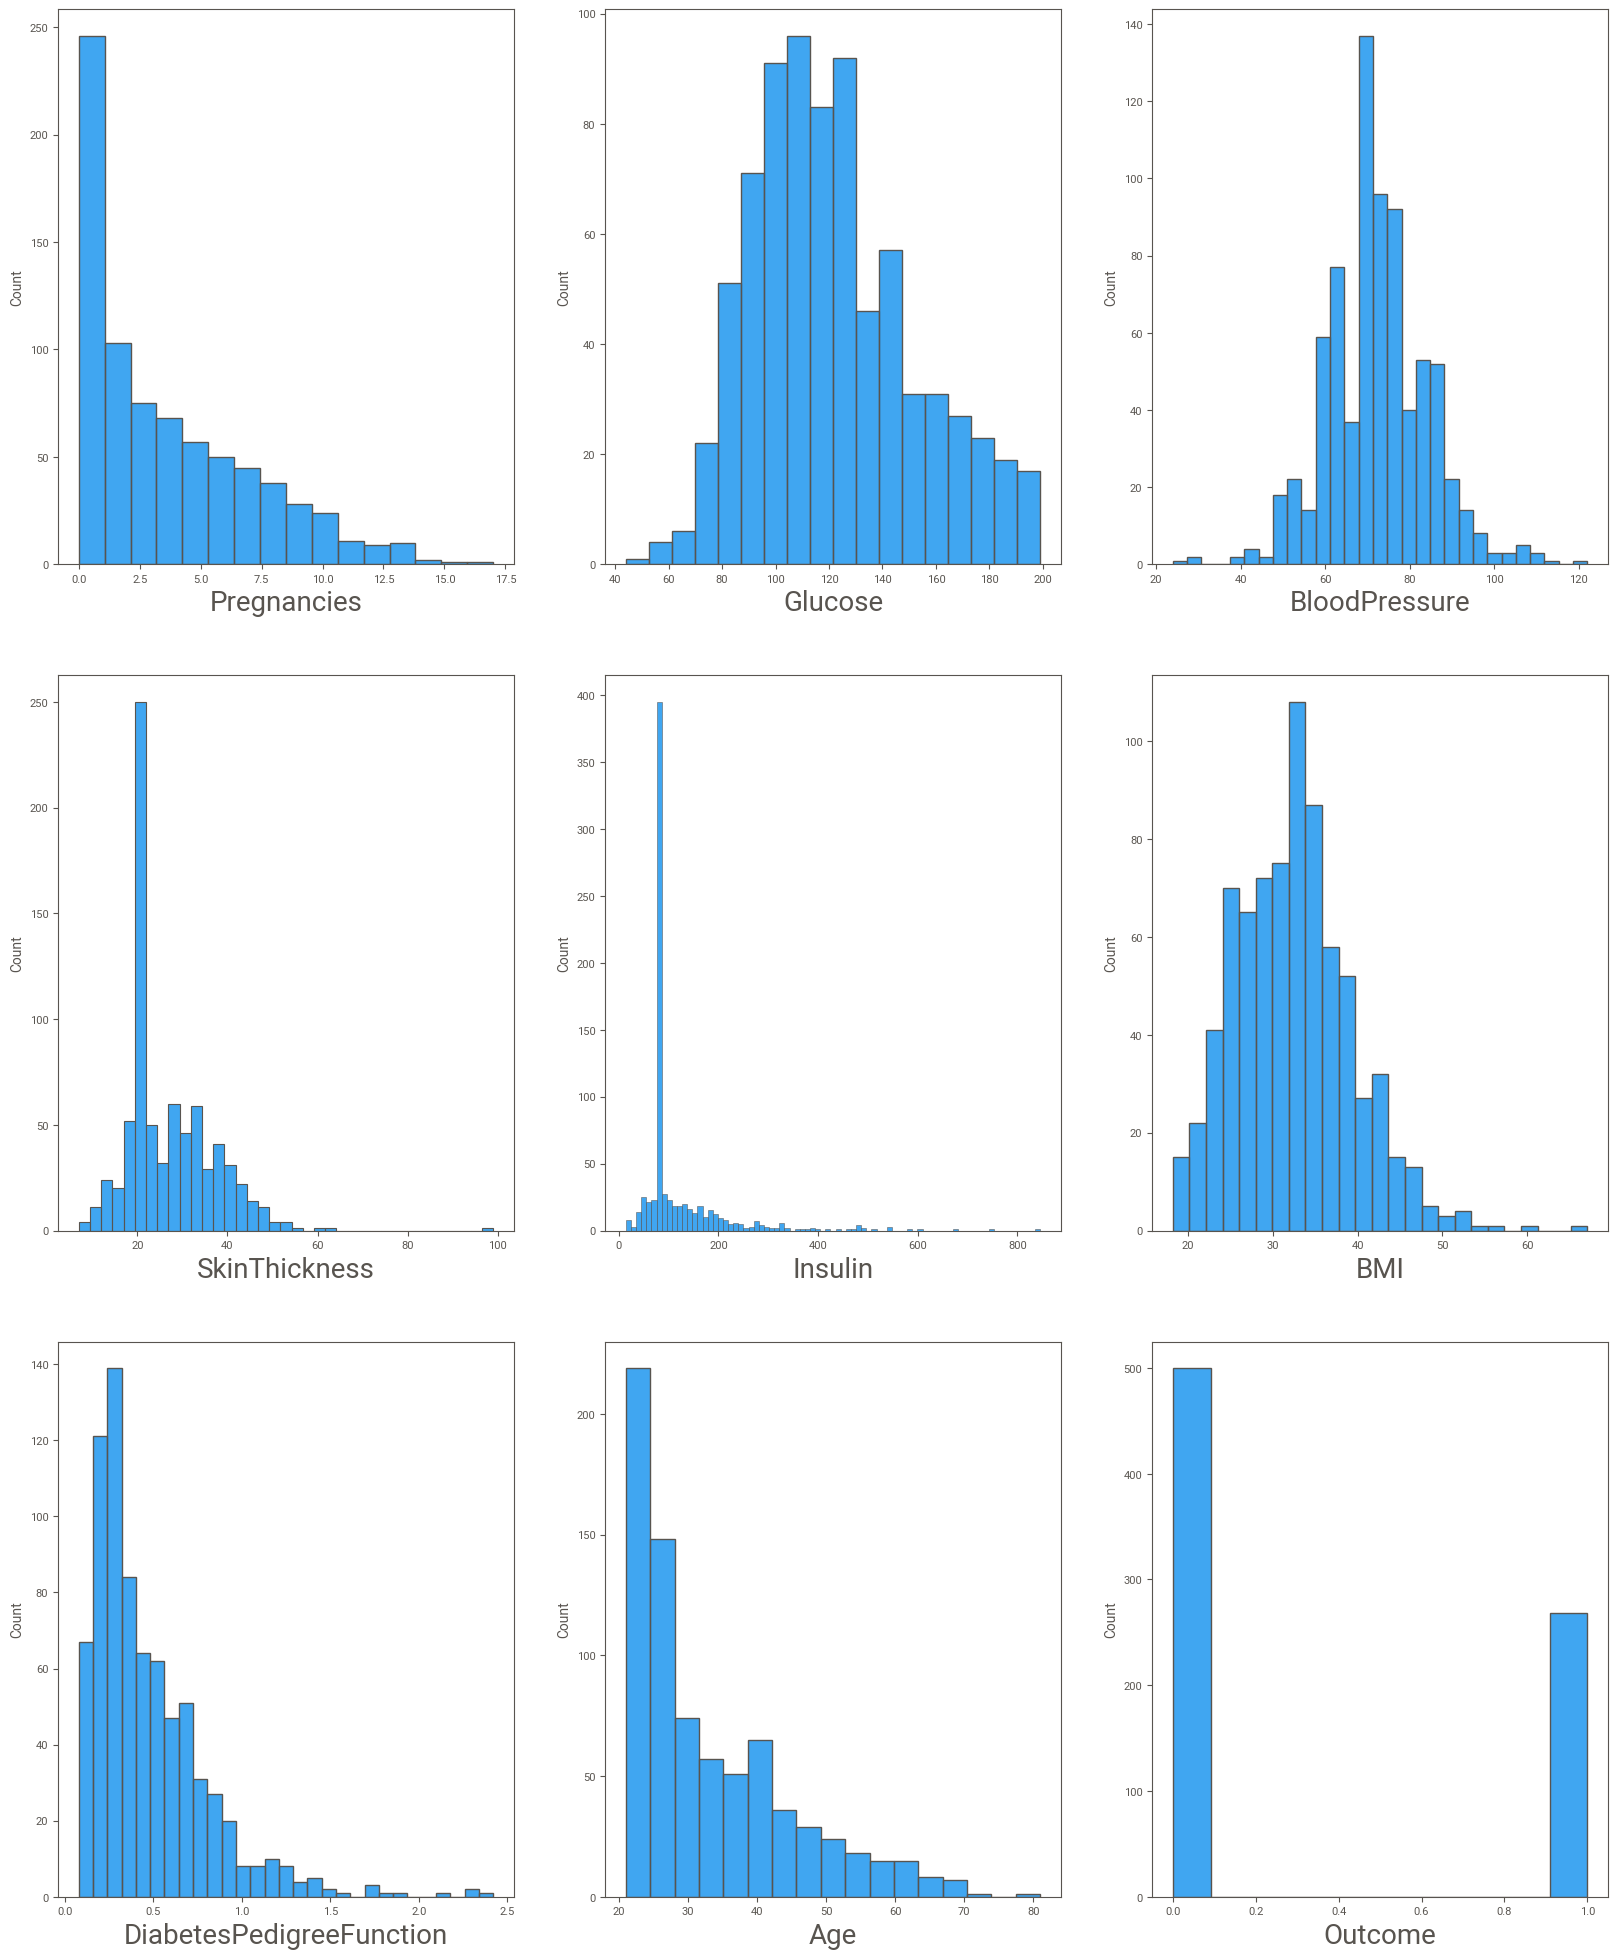

In [20]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information.
If our model doesn't work with accuracy, we will come back for more preprocessing.


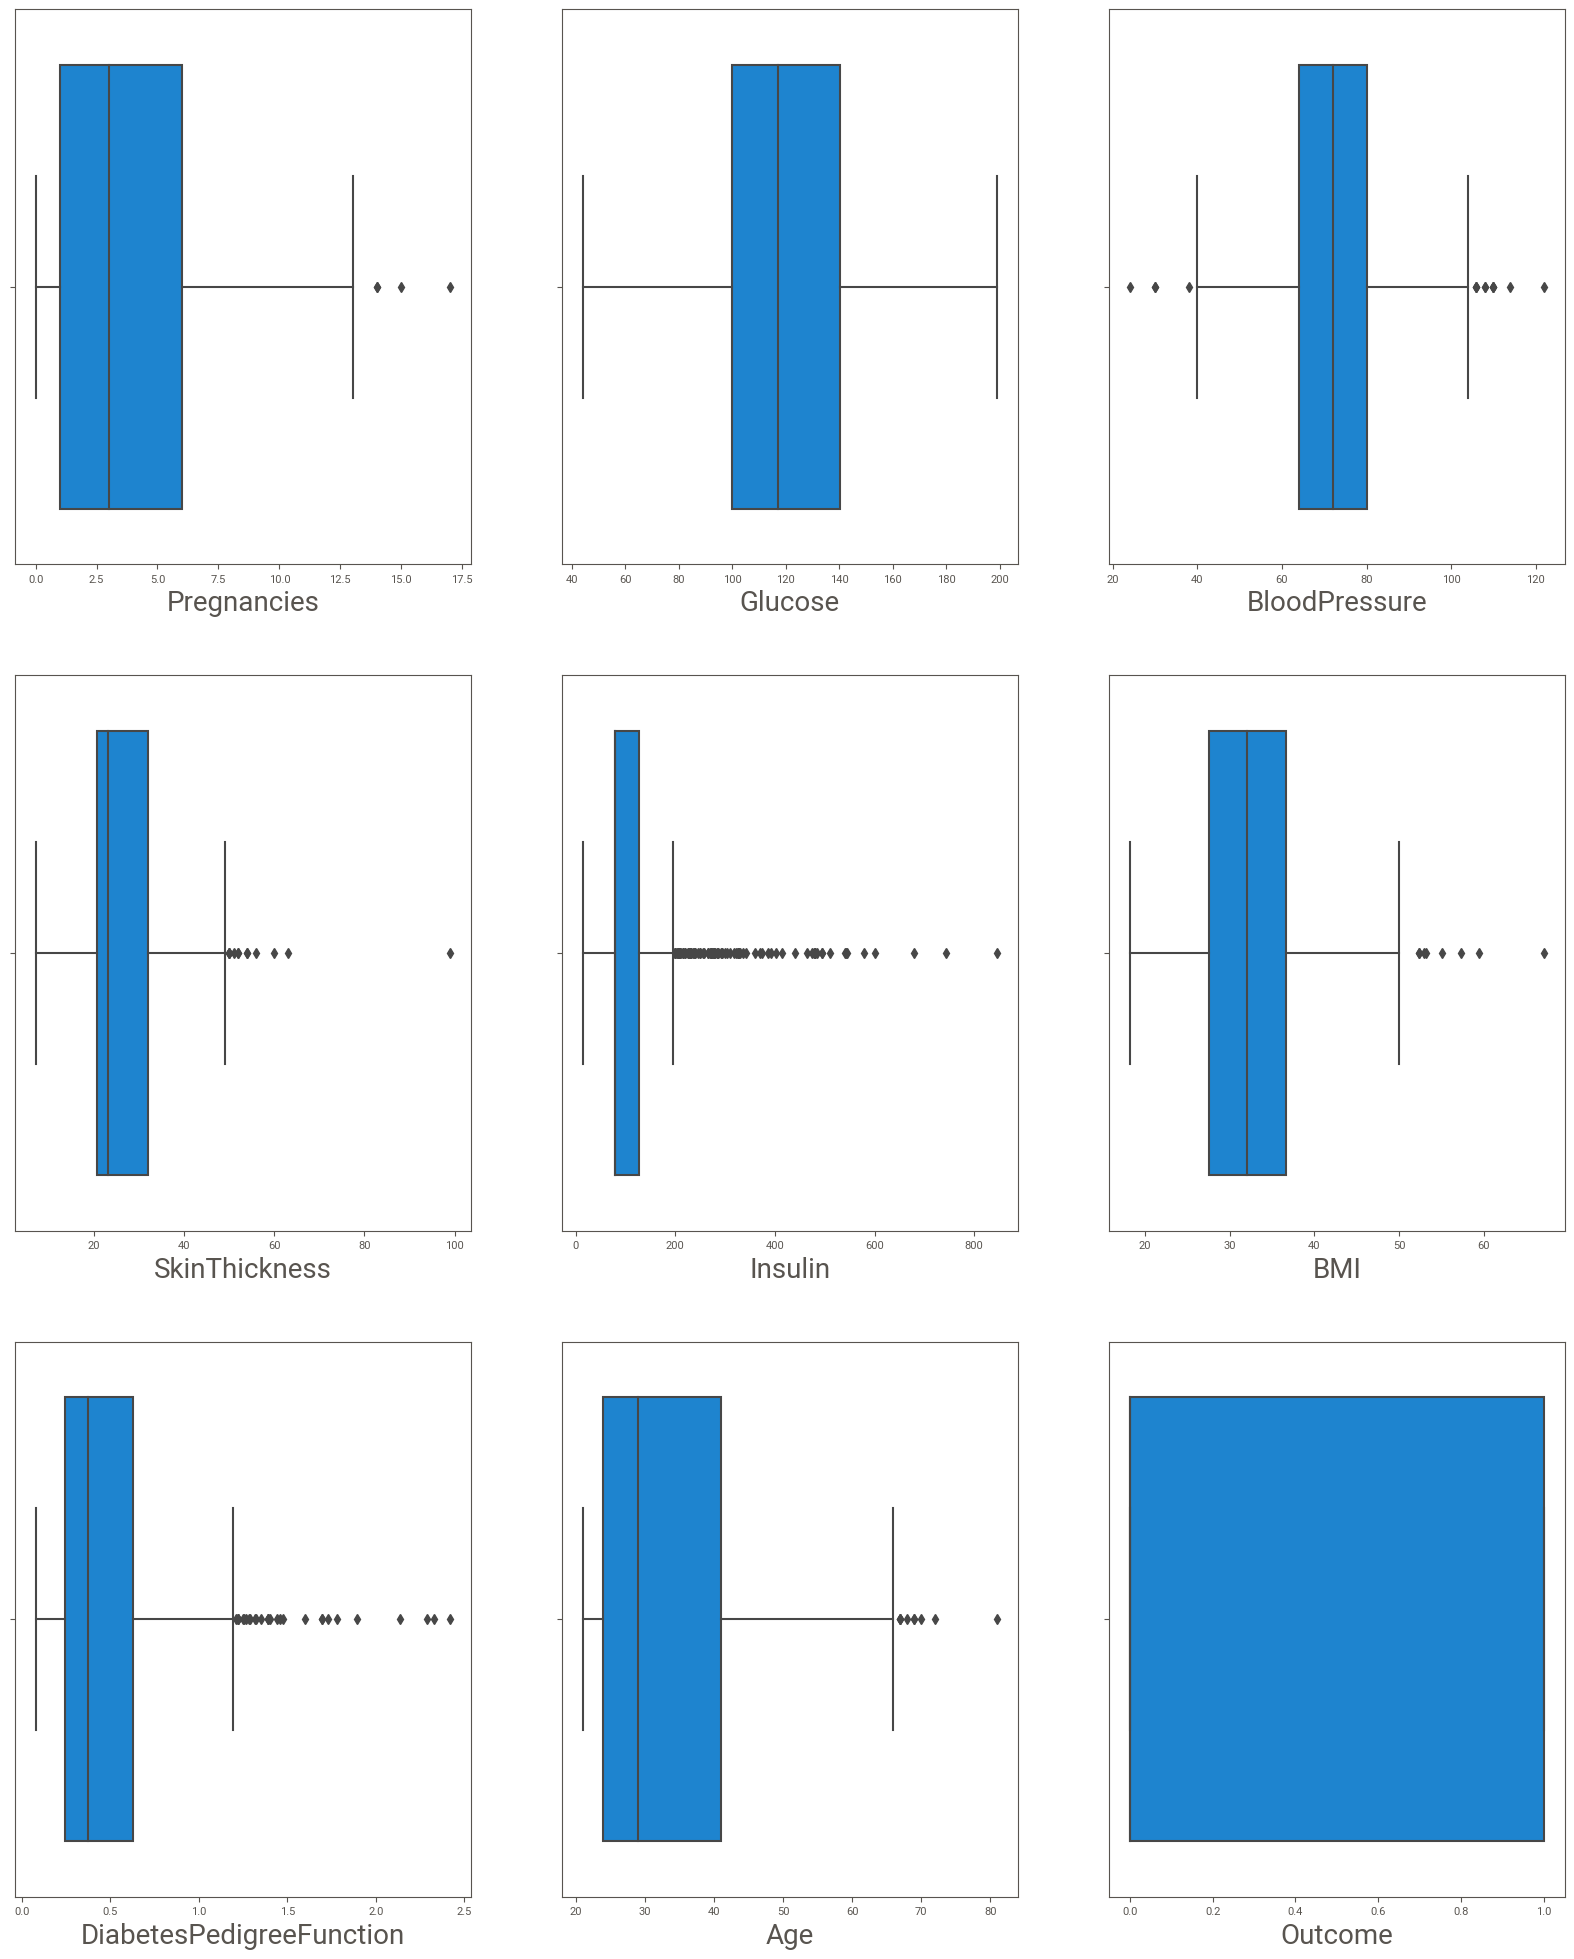

In [21]:
# Checking for outliers
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=column,data=data) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Feature Selection

<AxesSubplot:>

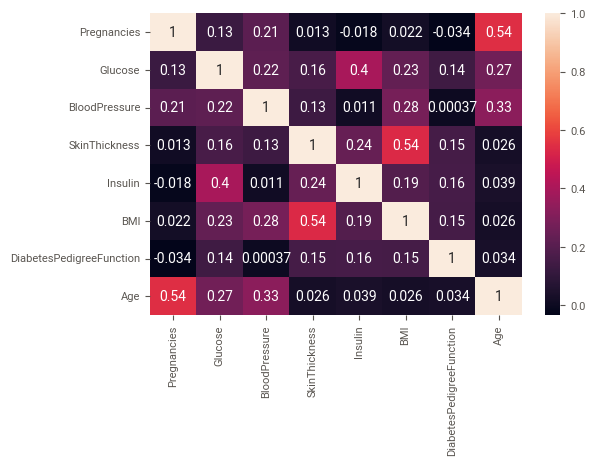

In [22]:
sns.heatmap(data.drop('Outcome',axis=1).corr(),annot=True)# checking for correlation
## NO correlated features are present

In [23]:
## checking the duplicate rows
data.duplicated().sum()

0

In [24]:
## checking the constant features in numerical 
data.describe()
## the standard deviation of any feature is 0,
#that means we have constant feature,and we should remove.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Model Creation

In [25]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [26]:
## Defining X and y and creating dependent and independent variables
X = data.drop(columns = ['Outcome']) ## independent variable
y = data['Outcome'] ## Dependent or target variable or the variable which we have to predict

In [27]:
X 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [28]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)# scaling independent variables

In [29]:
X_scaled #scaled data

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [30]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 355)#splitting data into train and test

In [31]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
    
log_reg.fit(x_train,y_train)#training model with training data

LogisticRegression()

In [32]:
y_train_pre=log_reg.predict(x_train)# predicting y_train  


Let's see how well our model performs on the test data set.


In [33]:
y_pred = log_reg.predict(x_test) # testing model 

In [34]:
y_train.shape # to know the shape of y_train (rows and columns)

(576,)

In [35]:
y_pred.shape # to know the shape of y_pred (rows and columns )

(192,)

In [36]:
## calculating accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,precision_score,recall_score,f1_score,classification_report
#accuracy = accuracy_score(y_train,y_train_pre)# model traning accuracy  
#a#ccuracy

In [37]:
test_accuracy=accuracy_score(y_test,y_pred)
test_accuracy

0.7552083333333334

In [38]:
# Precison on testing
Precision = precision_score(y_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.7

In [39]:
# Recall on testing
Recall = recall_score(y_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.5223880597014925

In [40]:
# F1 Score
F1_Score = f1_score(y_test,y_pred)# when precision and recall both are important
F1_Score

0.5982905982905983

In [41]:
# Area Under Curve  ## Not required now.Will discuss after 4 to 5 algorithms
auc = roc_auc_score(y_test, y_pred)
auc

0.7011940298507463

In [42]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [43]:
##confusion matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
Outcome,,
0,110,15
1,32,35


In [44]:
report=classification_report(y_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       125
           1       0.70      0.52      0.60        67

    accuracy                           0.76       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



**ROC PLOT**

In [45]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(x_test)[:,1]

In [46]:
probs#probabilities of class 1


array([0.18243294, 0.28820263, 0.31665727, 0.29286659, 0.09694018,
       0.30599734, 0.17941555, 0.17408453, 0.41531474, 0.45643369,
       0.1083232 , 0.04511373, 0.35652211, 0.90121058, 0.96147917,
       0.21691304, 0.45573496, 0.07071448, 0.30882444, 0.01138037,
       0.05961597, 0.6852929 , 0.32514523, 0.03127498, 0.3920974 ,
       0.38023461, 0.39629364, 0.09966189, 0.09938095, 0.08864408,
       0.48279132, 0.63779319, 0.80566434, 0.23650662, 0.17488524,
       0.03657687, 0.3318217 , 0.06098156, 0.10907067, 0.03991381,
       0.17884847, 0.05673696, 0.26093581, 0.79360898, 0.28753245,
       0.08795856, 0.09044549, 0.05644278, 0.20120617, 0.41759495,
       0.17699279, 0.8547375 , 0.28297877, 0.20687856, 0.64632816,
       0.03049442, 0.45570124, 0.03431411, 0.89340146, 0.11896219,
       0.0640821 , 0.07360614, 0.65032846, 0.63392561, 0.66595895,
       0.72250595, 0.78771856, 0.08187299, 0.04096916, 0.25976883,
       0.13416676, 0.13371649, 0.86213891, 0.94488715, 0.44833

In [47]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)#checking where probability of class 1 is  greater than threshold

In [48]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):# it will create matrix /array from range 0 to 1 with step 0.1
    y_predict = predict_threshold(log_reg,x_test,thr)# it will check result  for  each threshold from 0 to 0.1
    print("Threshold :",thr)#printing threshold
    print(confusion_matrix(y_test,y_pred))# confusion matrix for each prediction

Threshold : 0.0
[[110  15]
 [ 32  35]]
Threshold : 0.1
[[110  15]
 [ 32  35]]
Threshold : 0.2
[[110  15]
 [ 32  35]]
Threshold : 0.30000000000000004
[[110  15]
 [ 32  35]]
Threshold : 0.4
[[110  15]
 [ 32  35]]
Threshold : 0.5
[[110  15]
 [ 32  35]]
Threshold : 0.6000000000000001
[[110  15]
 [ 32  35]]
Threshold : 0.7000000000000001
[[110  15]
 [ 32  35]]
Threshold : 0.8
[[110  15]
 [ 32  35]]
Threshold : 0.9
[[110  15]
 [ 32  35]]


In [49]:
## visualizing the roc plot
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, probs) #roc curve 
print('AUC: %.2f' % auc)

AUC: 0.84


In [51]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
# it will return 
#Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
#Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
#Decreasing thresholds on the decision function used to compute fpr and tpr

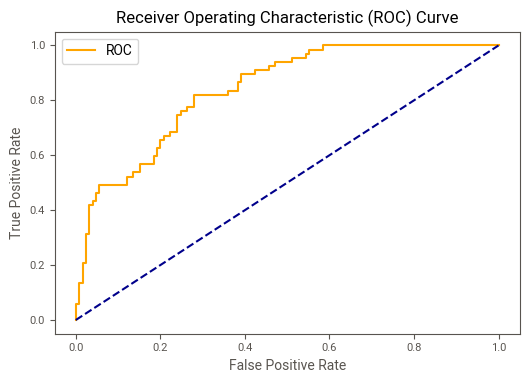

In [52]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)#plotting ruc curve